# Cafe Shoppe


I have implemented two algorithms that determine in what order to make a series of coffeeshop drinks. The drinks are ordered at various times during the day and take various amounts of time to make. The data formats, input data, and expected output data are detailed below. 

Description

The baristas are trying to figure out the best way to serve drinks to customers, and they need your help!

There are exactly 2 baristas, with ID numbers [1, 2]. A barista can make at most 1 drink at a time. For example, if a barista starts making a 3-minute tea at time=5, she will deliver the drink at time=8 and can start making a new drink at time=8.

The work day starts at time=0 and ends at time=100.



```python
There are three types of drinks, each of which takes a different amount of time to make and yields a different profit.


[
    { "type": "tea",      "brew_time": 3, "profit": 2 },
    { "type": "latte",    "brew_time": 4, "profit": 3 },
    { "type": "affogato", "brew_time": 7, "profit": 5 }
]
Example Input / Output of your Program

Below is example input data of orders made in a given day, ordered by order_time. See file input.json for a full list.

[
    { "order_id": 1, "order_time": 0, "type": "affogato" },
    { "order_id": 2, "order_time": 1, "type": "tea" },
    { "order_id": 3, "order_time": 2, "type": "latte" },
    { "order_id": 4, "order_time": 2, "type": "tea" }
]
Below is example output data. See file output_fifo.json for the expected output given input.json. The output of your solutions should include drinks that each barista makes and the time that the barista starts making the drink. It must be valid json - an array of objects with the following format:

[
    { "order_id": 1, "start_time": 0, "barista_id": 1 },
    { "order_id": 2, "start_time": 1, "barista_id": 2 },
    { "order_id": 3, "start_time": 4, "barista_id": 2 },
    { "order_id": 4, "start_time": 7, "barista_id": 1 }
]


```




Caveat:

not all drinks will necessarily be completed
for the FIFO solution, all orders processed before or at time=100 will be delivered to the customer, even if the drinks are delivered after time=100. 

# Versions of libraries programs used. 

install files within requirements.txt. 

version of python used: 2.7.11

you can view this in jupyter notebook

# Description of Contents

create_data.py allows users to create new input data to test the two algorithms. 

type: 
    
    python create_data.py name
    
        Name here is the name.json that will be written to input_files. Edit the order_times to specify numpy distribution desired for orders. Modify p to change the probability that each type of drink is ordered.  

fifo.py runs the fifo algorithm solution on specified input file
** note, to display the output_fifo.json. Run fifo.py on input and then look at the ouput_fifo.json within output_files. The reason one must do this is that fifo_test.py also writes to output_fifo.json and they are different input files

type: 

    python fifo.py input_files/name
    
    to run the algorithm on name.json file contained within input_files

type: 

    python fifo_test.py
    
    to run tests on the fifo.py algorithm
    
view_three.py runs the optimized algorithm solution on specified input file

type: 
    
    python view_three.py input_files/name 
    
    to run the algorithm on name.json file contained within input_files 
    
type: 

    python view_three_test.py 
    
    to run tests on view_three.py
    
    
metric.py displays metrics for specific algorithm. It will be called by fifo.py and optimized.py 

type: 
    
    python metric_test.py test
    
    to run tests on metric.py
    
**make sure you are in input_files when running the next command

valid_dist.py view each of the distributions of orders_time for orders by typing: 
	
    python valid_dist.py name

	(to view distribution of time of orders in name.json as x axis and counts as y axis)
    
    
fifo_tests is a folder containing all of the test files for fifo.py

input_files is a folder containing all of the input files that can be run by either algorithm

metric_tests is a folder containing all of the test files for metric.py

output_files is a folder containing all of the output files generated by fifo.py, view_three.py, and metric.py (both fifo and optimized algorithm generates files with *_metric_output.json (where * is the name of the algorithm), which is simply a file to help metric.py calculate metrics)

# Metric Description

Metrics I used: 

profit after algorithm was run, 

number of orders completed after algorithm was run, 

percent of order: percent of total orders completed out of orders that were made that day, 

average wait_time of all drinks brewed, 

percentage of tea completed out of number of tea orders made in that day,

percentage of latte completed out of number of latte orders made in that day, 

percentage of affogato completed out of number of affogato orders made in that day, 

tea_avg_wait: average wait time of tea orders

latte_avg_wait: average wait time of latte orders

affogato_avg_wait: average wait time of affogato orders

# Algorithm Description

The optimized algorithm, view_three.py looks at three orders at a time. The algorithm will then sort these three orders into increasing time to brew the drinks. The fastest drink to brew will be given to the barista first available, then the medium drink, and then lastly the slowest drink. The algorithm repeats this process until there are no more orders or there is not a number of orders that is divisible by 3. In the case that there is not a number of orders that is divisible by 3 or there are not at least 3 orders remaining to be processed, the algorithm will process the remaining orders greedily by giving the first available barista the first order.  

My justification for looking at three orders at a time is that it is possible to have a cafe where orders are made on an app and large queues will be built quickly. We at the cafe, may have delay to wait for three orders, but the delay will be large because people are placing orders via an app, so placing orders will be very fast. 

The optimzied algorithm causes the baristas to process the fastest drinks of the 3 ordered queue and is designed like this to decrease the average wait times of tea and latte. The order that takes the longest brewing time of the three will be processed last even if the order is made before the first two. 

I believe that this tradeoff to allow the drinks with faster brew time and less profit to have shorter wait times is justified because customers can justify a drink that is expensive to take a long time. On the contrary, a customer cannot justify that tea takes longer to brew than affogato while tea is cheaper than affogato. 

The other reason why processing drinks with shorter brew times first is better is that it allows the baristas to be available as soon as possible to process subsequent orders. 

The drinks that have shorter brew times also have less profit. However, the profit of processing more expensive drinks will be overtaken because the time saved processing shorter brew times first will result in more time to process more drinks and ultimately lead to more profit. 

The other reason why time is a little bit more important than profit is that percentage of orders for each type of drink is really important. In this day and age, Yelp and rivals post the customer experience. If there is less time to process orders, the cafe will have lots of drinks not processed. This will result in customers posting things online that says our company fails to complete most of tea orders for example. 

# Analysis

## 1. Uniform Distribution of Order Times and Uniform Distribution of Types of Drinks Ordered

We see that the view_three algorithm saves time and is able to process just as many drinks as fifo. Now, I do understand that tying does not seem better. However, I would like to point out that fifo algorithm has a caveat that allows fifo to process orders that are completed after t=100, but the optimized algorithm does not have this luxury. Despite this caveat, tying is impressive because it means that in the worst case, fifo.py can process two more drinks than view_three.py. 

Even though the profit is at a difference of 6, I would say 6 is not too signficiant because if the fifo.py caveat is lifted from view_three.py, the best case allows view_three.py to process 2 drinks and the two drinks with the least profit would yield 6. Now, if view_three were able to process two more drinks by lifting the fifo caveat, view_three would have a better percentage of drinks completed, which shows that this algorithm saves time and can complete more orders. 

Glancing at the average wait times of each individual drink, we see that fifo is slower than view_three at completing tea by about t=4 (let us just assume it is seconds as a placeholder for now), latte by t=1. However, fifo processes affogato faster than view_three by t=4. This is a consequence that the algorithm trades for the shorter wait time of teas and lattes. 

In conclusion, this first ditribution optimizes the metrics I set out to optimize and yields the results that I anticipated. The view_three algorithm does better than the fifo algorithm except in profit, but not by a large enough margin to deem this view_three algorithm as inferior to the fifo algorithm. 

In [5]:
%run fifo.py input_files/input

['fifo.py', 'input_files/input']
running fifo.py on input file input_files/input.json
profit: 137 num of order: 38 percent of order: 0.8085106382978723 average wait_time: 14.421052631578947
tea_comp:  9 latte_comp: 13 affogato_count:  16
tea_total:  15 latte_total:  15 affogato_total 17
tea_avg_wait 14.444444444444445 latte_avg_wait 13.0 affogato_avg_wait 15.5625
tea_percent_comp 0.6 latte_percent_comp 0.8666666666666667 affogato_percent_comp 0.9411764705882353


In [2]:
%run view_three.py input_files/input

['view_three.py', 'input_files/input']
running optimzed.py on input file input_files/input.json
profit: 131 num of order: 38 percent of order: 0.8085106382978723 average wait_time: 14.289473684210526
tea_comp:  11 latte_comp: 13 affogato_count:  14
tea_total:  15 latte_total:  15 affogato_total 17
tea_avg_wait 10.272727272727273 latte_avg_wait 12.0 affogato_avg_wait 19.571428571428573
tea_percent_comp 0.7333333333333333 latte_percent_comp 0.8666666666666667 affogato_percent_comp 0.8235294117647058


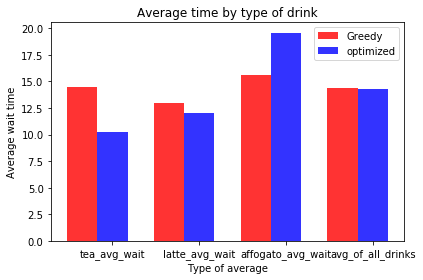

In [8]:
import numpy as np
import matplotlib.pyplot as plt

n_groups = 4
means_greedy = (14.444444444444445, 13.0, 15.5625, 14.421052631578947)
means_optimized = (10.272727272727273, 12.0, 19.571428571428573, 14.289473684210526)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_greedy, bar_width, alpha=opacity, color='r', label='Greedy')
rects2 = plt.bar(index + bar_width, means_optimized, bar_width, alpha=opacity, color='b', label='optimized')

plt.xlabel('Type of average')
plt.ylabel('Average wait time')
plt.title('Average time by type of drink')
plt.xticks(index + bar_width, ('tea_avg_wait', 'latte_avg_wait', 'affogato_avg_wait', 'avg_of_all_drinks'))
plt.legend()

plt.tight_layout()
plt.show()

# 2. Poisson Distribution Mean 50 of Orders and Uniform Distribution for Types of Drinks Ordered

I chose mean of 50 because there may be cafes that have most people make purchases to prevent themselves from afternoon crash. The uniform distribution for types of drinks is used, just because the input file had a uniform distribution for types of drinks ordered. 

Profit different by 6, but in the aforementioned distribution, I explained why that is not significant. 

Number of orders different by 1, which is really good for view_three given the fifo caveat. 

Tea average wait time of tea is shorter by about 0.5, latte average wait time is shorter by 0.7, and affogato average wait time is longer by 0.8. 

These number are not as good as the differences seen in the previous algorithm because these differences are so small. 

In this result, view_three does well in saving time and completing orders and yielding a good profit, but does not do too well in decreasing the average wait times of each drink. All in all, the view_three algorithm does not lose in any metric (if we count profit and orders as a win for view_three considering the fact that fifo has the caveat as an advantage). 

In [9]:
%run fifo.py input_files/p1

['fifo.py', 'input_files/p1']
running fifo.py on input file input_files/p1.json
profit: 96 num of order: 30 percent of order: 0.6382978723404256 average wait_time: 24.033333333333335
tea_comp:  10 latte_comp: 12 affogato_count:  8
tea_total:  16 latte_total:  20 affogato_total 11
tea_avg_wait 22.0 latte_avg_wait 24.583333333333332 affogato_avg_wait 25.75
tea_percent_comp 0.625 latte_percent_comp 0.6 affogato_percent_comp 0.7272727272727273


In [10]:
%run view_three.py input_files/p1

['view_three.py', 'input_files/p1']
running optimzed.py on input file input_files/p1.json
profit: 90 num of order: 29 percent of order: 0.6170212765957447 average wait_time: 23.551724137931036
tea_comp:  11 latte_comp: 11 affogato_count:  7
tea_total:  16 latte_total:  20 affogato_total 11
tea_avg_wait 21.454545454545453 latte_avg_wait 23.818181818181817 affogato_avg_wait 26.428571428571427
tea_percent_comp 0.6875 latte_percent_comp 0.55 affogato_percent_comp 0.6363636363636364


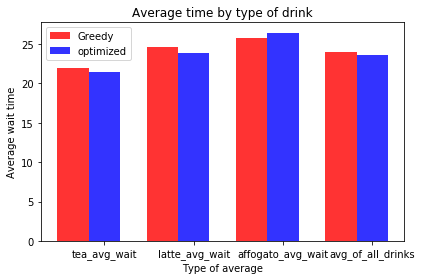

In [11]:
import numpy as np
import matplotlib.pyplot as plt

n_groups = 4
means_greedy = (22.0, 24.583333333333332, 25.75,  24.033333333333335)
means_optimized = (21.454545454545453, 23.818181818181817, 26.428571428571427, 23.551724137931036)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_greedy, bar_width, alpha=opacity, color='r', label='Greedy')
rects2 = plt.bar(index + bar_width, means_optimized, bar_width, alpha=opacity, color='b', label='optimized')

plt.xlabel('Type of average')
plt.ylabel('Average wait time')
plt.title('Average time by type of drink')
plt.xticks(index + bar_width, ('tea_avg_wait', 'latte_avg_wait', 'affogato_avg_wait', 'avg_of_all_drinks'))
plt.legend()

plt.tight_layout()
plt.show()

# 3. Poisson Distribution Mean of 50 of Orders and Non-Uniform Distribution for Types of Drinks Ordered

I decided to make the non-uniform distribution have lattes as the most probable drink because it is the drink that has a moderate price. I am assuming teas are the second most significant because it is the cheapest drink and thus is the most affordable drink that most people are willing to buy. Affogatos are the least probable drink for people to order because it is the most expensive drink, it is a luxury item! 

The profit is now at a difference of 8, which means that even if the caveat is lifted, view_three cannot exceed the profit or tie. Also, the number of orders is at a difference of 3. The tea has shorter wait time for view_three than fifo by t=3.5, the latte has a longer wait time of t=0.5. Now view_three does not perform significantly better than fifo in most metrics, but view_three does do well in decreasing the wait_time of tea by a significant margin. Since, fifo does better on all metrics except the average wait time of tea, I have to say for this distribution of orders and and types of ordered drinks, fifo may be better. 

Given more time, I would definitely like to create more distributions with same mean and distribution for types of orders to then make a better decision on which algorithm is better because running an algorithm once on a distribution may show one algorithm is more significant than another by chance. 



In [12]:
%run fifo.py input_files/p2

['fifo.py', 'input_files/p2']
running fifo.py on input file input_files/p2.json
profit: 92 num of order: 35 percent of order: 0.7446808510638298 average wait_time: 24.0
tea_comp:  13 latte_comp: 22 affogato_count:  0
tea_total:  17 latte_total:  28 affogato_total 2
tea_avg_wait 26.53846153846154 latte_avg_wait 22.5 affogato_avg_wait 0
tea_percent_comp 0.7647058823529411 latte_percent_comp 0.7857142857142857 affogato_percent_comp 0.0


In [13]:
%run view_three.py input_files/p2

['view_three.py', 'input_files/p2']
running optimzed.py on input file input_files/p2.json
profit: 84 num of order: 32 percent of order: 0.6808510638297872 average wait_time: 23.0
tea_comp:  12 latte_comp: 20 affogato_count:  0
tea_total:  17 latte_total:  28 affogato_total 2
tea_avg_wait 23.0 latte_avg_wait 23.0 affogato_avg_wait 0
tea_percent_comp 0.7058823529411765 latte_percent_comp 0.7142857142857143 affogato_percent_comp 0.0


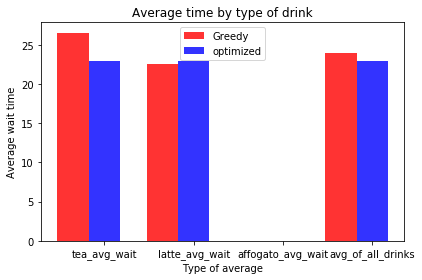

In [14]:
import numpy as np
import matplotlib.pyplot as plt

n_groups = 4
means_greedy = (26.53846153846154, 22.5, 0, 24.0)
means_optimized = (23.0, 23.0, 0, 23.0)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_greedy, bar_width, alpha=opacity, color='r', label='Greedy')
rects2 = plt.bar(index + bar_width, means_optimized, bar_width, alpha=opacity, color='b', label='optimized')

plt.xlabel('Type of average')
plt.ylabel('Average wait time')
plt.title('Average time by type of drink')
plt.xticks(index + bar_width, ('tea_avg_wait', 'latte_avg_wait', 'affogato_avg_wait', 'avg_of_all_drinks'))
plt.legend()

plt.tight_layout()
plt.show()

# 4. Poisson Distribution Mean of 30 of Orders and Non-Uniform Distribution for Types of Drinks Ordered

I chose mean of 30 this time because this is the scenario of a cafe where there are most orders in the morning, even more than around lunch time. 

Profit is different by 8 and view_three is not winning this metric. However, view_three does process only 2 less orders than fifo, which is a positive for view_three, given the fifo caveat. 

The average wait time of tea is shorter by t=1.8 and the average wait time of latte is shorter by t=2.2 for view_three algorithm. 

I would say that view_three is better than fifo beause it does better in 3 of the four metrics. 

In [16]:
%run fifo.py input_files/p3

['fifo.py', 'input_files/p3']
running fifo.py on input file input_files/p3.json
profit: 116 num of order: 37 percent of order: 0.7872340425531915 average wait_time: 35.7027027027027
tea_comp:  11 latte_comp: 18 affogato_count:  8
tea_total:  15 latte_total:  22 affogato_total 10
tea_avg_wait 37.54545454545455 latte_avg_wait 33.333333333333336 affogato_avg_wait 38.5
tea_percent_comp 0.7333333333333333 latte_percent_comp 0.8181818181818182 affogato_percent_comp 0.8


In [17]:
%run view_three.py input_files/p3

['view_three.py', 'input_files/p3']
running optimzed.py on input file input_files/p3.json
profit: 108 num of order: 35 percent of order: 0.7446808510638298 average wait_time: 33.77142857142857
tea_comp:  11 latte_comp: 17 affogato_count:  7
tea_total:  15 latte_total:  22 affogato_total 10
tea_avg_wait 35.18181818181818 latte_avg_wait 31.235294117647058 affogato_avg_wait 37.714285714285715
tea_percent_comp 0.7333333333333333 latte_percent_comp 0.7727272727272727 affogato_percent_comp 0.7


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_groups = 4
means_greedy = ()
means_optimized = ()

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_greedy, bar_width, alpha=opacity, color='r', label='Greedy')
rects2 = plt.bar(index + bar_width, means_optimized, bar_width, alpha=opacity, color='b', label='optimized')

plt.xlabel('Type of average')
plt.ylabel('Average wait time')
plt.title('Average time by type of drink')
plt.xticks(index + bar_width, ('tea_avg_wait', 'latte_avg_wait', 'affogato_avg_wait', 'avg_of_all_drinks'))
plt.legend()

plt.tight_layout()
plt.show()